# Building an OIS Curve with Meeting Dates

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 16:00 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuation_date = Date(18, 9, 2019)

Set up meeting dates

In [4]:
m1Date = Date(23, 11, 2019)
m2Date = Date(20, 1, 2020)
m3Date = Date(18, 3, 2020)
m4Date = Date(20, 5, 2020)

## Building the OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [5]:
depoDCCType = DayCountTypes.THIRTY_E_360_ISDA
depos = []
spot_days = 0
settlement_date = valuation_date.add_weekdays(spot_days)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.ACT_365F
fixedFreqType = FrequencyTypes.ANNUAL

# This OIS stops at the next meeting date
swap = OIS(settlement_date, m1Date, swapType, 0.0420, fixedFreqType, fixedDCCType); swaps.append(swap)

# These OIS are forward starting and last between MM meeting dates
swap = OIS(m1Date, m2Date, swapType, 0.0320, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(m2Date, m3Date, swapType, 0.0520, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(m3Date, m4Date, swapType, 0.0320, fixedFreqType, fixedDCCType); swaps.append(swap)

# Standard OIS with standard annual terms
swap = OIS(settlement_date, "2Y", swapType, 0.0330, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3Y", swapType, 0.0350, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "4Y", swapType, 0.0375, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "5Y", swapType, 0.0400, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "7Y", swapType, 0.0420, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "10Y", swapType, 0.0430, fixedFreqType, fixedDCCType); swaps.append(swap)

In [6]:
oisCurveFF = OISCurve(valuation_date, [], [], swaps, InterpTypes.FLAT_FWD_RATES)

In [7]:
oisCurveLF = OISCurve(valuation_date, [], [], swaps, InterpTypes.LINEAR_FWD_RATES)

In [8]:
oisCurveLZ = OISCurve(valuation_date, [], [], swaps, InterpTypes.LINEAR_ZERO_RATES)

In [9]:
for swap in swaps:
    v_ff = swap.value(valuation_date, oisCurveFF) / swap._fixed_leg._notional
    v_lf = swap.value(valuation_date, oisCurveLF) / swap._fixed_leg._notional
    v_lz = swap.value(valuation_date, oisCurveLZ) / swap._fixed_leg._notional
    print("%12s %12.8f %12.8f %12.8f" % (swap._maturity_date, v_ff, v_lf, v_lz))

 25-NOV-2019   0.00000000   0.00000000   0.00000000
 20-JAN-2020  -0.00000000   0.00000000  -0.00000000
 18-MAR-2020   0.00000000   0.00000000   0.00000000
 20-MAY-2020   0.00000000  -0.00000000   0.00000000
 20-SEP-2021   0.00000000  -0.00000000   0.00000000
 19-SEP-2022  -0.00000000   0.00000000   0.00000000
 18-SEP-2023   0.00000000  -0.00000000  -0.00000000
 18-SEP-2024  -0.00000000  -0.00000000   0.00000000
 18-SEP-2026  -0.00000000  -0.00000000  -0.00000000
 18-SEP-2029  -0.00000000  -0.00000000  -0.00000000


All of the swaps are repriced.

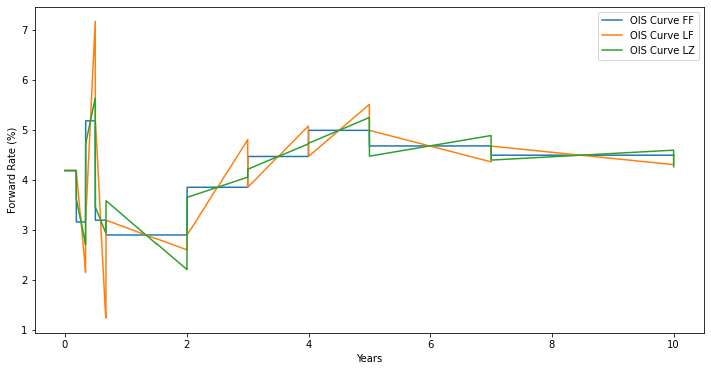

In [10]:
years = np.linspace(0, 10, 10*365)
dates = settlement_date.add_years(years)
oisCurveFwdsFF = oisCurveFF.fwd(dates)    
oisCurveFwdsLF = oisCurveLF.fwd(dates)    
oisCurveFwdsLZ = oisCurveLZ.fwd(dates)    

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="OIS Curve FF")
plt.plot(years, oisCurveFwdsLF*100.0, label="OIS Curve LF")
plt.plot(years, oisCurveFwdsLZ*100.0, label="OIS Curve LZ")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

The different interpolation schemes have their own strengths and weaknesses.

In [11]:
for swap in swaps:
    s_ff = swap.swap_rate(settlement_date, oisCurveFF) 
    s_lf = swap.swap_rate(settlement_date, oisCurveLF) 
    s_lz = swap.swap_rate(settlement_date, oisCurveLZ) 
    print("%12s %12.6f %12.6f %12.6f" % (swap._termination_date, s_ff*100, s_lf*100, s_lz*100))

 23-NOV-2019     0.000004     0.000004     0.000004
 20-JAN-2020     0.000003     0.000003     0.000003
 18-MAR-2020     0.000005     0.000005     0.000005
 20-MAY-2020     0.000003     0.000003     0.000003
 18-SEP-2021     0.000003     0.000003     0.000003
 18-SEP-2022     0.000003     0.000004     0.000004
 18-SEP-2023     0.000004     0.000004     0.000004
 18-SEP-2024     0.000004     0.000004     0.000004
 18-SEP-2026     0.000004     0.000004     0.000004
 18-SEP-2029     0.000004     0.000004     0.000004


In [13]:
swap = swaps[4]
Schedule(swap._effective_date, swap._maturity_date, fixedFreqType)

OBJECT TYPE: Schedule
EFFECTIVE DATE: 18-SEP-2019
END DATE: 20-SEP-2021
FREQUENCY: FrequencyTypes.ANNUAL
CALENDAR: CalendarTypes.WEEKEND
BUSDAYRULE: BusDayAdjustTypes.FOLLOWING
DATEGENRULE: DateGenRuleTypes.BACKWARD
ADJUST TERM DATE: True
END OF MONTH: False

In [14]:
swap.print_fixed_leg_pv()

START DATE: 18-SEP-2019
MATURITY DATE: 20-SEP-2021
COUPON (%): 3.3000000000000003
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.ACT_365F
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    RATE      PAYMENT       DF          PV        CUM PV
18-SEP-2020  18-SEP-2019  18-SEP-2020   366  1.002740   3.30000     33090.41  0.96301971     31866.72     31866.72
20-SEP-2021  18-SEP-2020  20-SEP-2021   367  1.005479   3.30000     33180.82  0.93704148     31091.81     62958.52


In [15]:
for swap in swaps:
    s_ff = oisCurveFF.swap_rate(swap._effective_date,swap._termination_date, fixedFreqType, fixedDCCType) 
    s_lf = oisCurveLF.swap_rate(swap._effective_date, swap._termination_date, fixedFreqType, fixedDCCType) 
    s_lz = oisCurveLZ.swap_rate(swap._effective_date, swap._termination_date, fixedFreqType, fixedDCCType) 
    print("%12s %12.6f %12.6f %12.6f" % (swap._maturity_date, s_ff*100, s_lf*100, s_lz*100))

 25-NOV-2019     4.200000     4.200000     4.200000
 20-JAN-2020     3.200000     3.200000     3.200000
 18-MAR-2020     5.200000     5.200000     5.200000
 20-MAY-2020     3.200000     3.200000     3.200000
 20-SEP-2021     3.299673     3.299697     3.299728
 19-SEP-2022     3.499885     3.499904     3.499930
 18-SEP-2023     3.750000     3.750000     3.750000
 18-SEP-2024     4.000000     4.000000     4.000000
 18-SEP-2026     4.200000     4.200000     4.200000
 18-SEP-2029     4.300000     4.300000     4.300000


Copyright (c) Dominic O'Kane 2020